Optimization Project

VRP-RTR

Jang suk Charlie Roh <br/><br/>

# Modules Imported

In [1]:
import sympy 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.optimize import minimize
import pandas as pd

# VLSVRP Generator

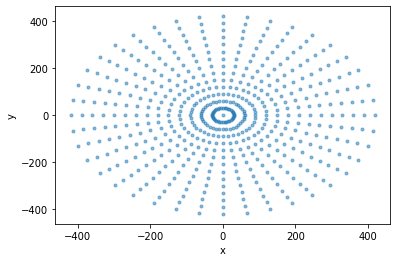

In [2]:
#setting np precision to 4 decimal points
np.set_printoptions(precision = 3, threshold = 1e5)

#seed for reproducibility
np.random.seed(7) 

#use only if randomness is desired
#rng for number customers and vehicle capacity
A = np.random.randint(1,40)
B = np.random.randint(1,30)
Q = np.random.randint(500,1000) # max vehicle capacity
R = np.random.randint(900,3000) #max route length


#for replicating results from paper, I used fixed values for A,B,Q and R
#I tried to replicate problem 21 in the paper
#if randomly generated A,B,Q,and R are desired, use the random values above

A = 40     #40
B = 14     #14
Q = 1200    #1200
R = 1800    #1800

alpha = 1 #controls how the length of neighborhood list
lmbda = 1.4 #controls savings for clark and wright algorithim


#number of customers
n = A*B

x = np.zeros(n)
y = np.zeros(n)
demand = np.zeros(n)


#generating demand for customer nodes
for i in range(n):
    if np.mod(i+1,4) == 2:
        demand[i] = 30
    elif np.mod(i+1,4) ==3:
        demand[i] = 30
    else:
        demand[i] = 10
        
# 0 demand for depot 
demand = np.insert(demand,0,0) 
demand_sum = np.sum(demand)

#x,y coordinates of customer nodes       
w = 0
for k in range(B):
    gamma = 30*(k+1)
    for i in range(A):
        w = w+1
        x[w-1] = gamma * np.cos(2*(i)*np.pi/A)
        y[w-1] = gamma * np.sin(2*(i)*np.pi/A)

#depot x,y coordinate
x = np.insert(x,0,0) 
y = np.insert(y,0,0) 

#map of the nodes
%matplotlib inline
plt.plot(x,y,'.',label = 'nodes',alpha = 0.5) #nodes in the same coordinates will be darker than the rest
plt.xlabel('x')
plt.ylabel('y')
plt.show()

nodes = list(zip(x,y))# zip corresponding x and y coordinates

# Manhattan Distances Between Nodes

In [3]:
#calculate manhattan distance between nodes using scipy.spatial.distance

manhattan_distance = cdist(nodes,nodes,metric = 'cityblock')
#sympy.Matrix(manhattan_distance)

# Clarke-Wright Savings Heuristic

In [4]:
#%%timeit
#coded in a way which one lmbda value is used
#function that calculates savings between 2 nodes
def savings(i,j):
    z = manhattan_distance[i,0] + manhattan_distance[0,j] - lmbda * manhattan_distance[i,j]
    return z

#create a savings matrix for every i,j
savings_matrix = np.zeros((n+1,n+1))
for i in np.arange(0,n+1,1):
    for j in np.arange(0,n+1,1):
        savings_matrix[i,j] = savings(i,j)

np.fill_diagonal(savings_matrix,0) # in order to eliminate i = j nodes, replace values with 0
savings_matrix2 = np.delete(savings_matrix,0,0)# remove the 1st row of 0s
savings_matrix3 = np.delete(savings_matrix2,0,1)# remove the 1st column of 0s

#savings list 
savings_list = []
for i in np.arange(0,n,1):
    for j in np.arange(0,n,1):
        savings_list.append([i+1,j+1,savings_matrix3[i,j]])#i+1 and j+1 due to removal of 1st row and column of 0s
        
sorted_savings = sorted(savings_list,key = lambda x:x[2],reverse = True)
#sorted_savings

In [5]:
vehicle_route = []
savings = []

#calculates capacity of a vehicle
def load(x):
    sum = 0
    for n in x:
        sum +=demand[i]
    return sum
#checks for feasibility of node in a vehicle
def check_node(b):
    for y in vehicle_route:
        for x in y:
            if j ==x:
                return 0
    return 1

w = 0
capacity = 0
for row in sorted_savings:
    i = row[0]
    j = row[1]
    s = row[2]
    if w == 0:
        vehicle_route.append([i,j])
        savings.append(s)
               
    else:
        if check_node(j):
            if load(vehicle_route[-1]+[j]) <Q:
                vehicle_route[-1].append(j)
                savings.append(s)
                
            else:
                vehicle_route.append([j])
                savings.append(s)
                
    w+=1
        
vehicle_route #solution from clarke and wright
savings_total = np.sum(savings) #savings corresponding to the solution from clarke and wright

temp_sol = vehicle_route
temp_savings = savings_total
vehicle_route
#the first element of each route is the 1st customer. 0 being the start and end node is implied
#each element of the list is a vehicle route, which is also a list

[[486,
  526,
  546,
  556,
  506,
  516,
  536,
  496,
  525,
  527,
  537,
  547,
  557,
  485,
  487,
  497,
  507,
  517,
  535,
  545,
  555,
  495,
  505,
  515,
  524,
  528,
  534,
  538,
  548,
  554,
  558,
  484,
  488,
  494,
  498,
  508,
  514,
  518,
  544,
  504,
  456],
 [466,
  446,
  476,
  445,
  447,
  455,
  457,
  465,
  467,
  475,
  477,
  559,
  529,
  539,
  549,
  533,
  523,
  553,
  543,
  509,
  489,
  493,
  499,
  519,
  513,
  483,
  503,
  464,
  478,
  444,
  448,
  454,
  458,
  468,
  474,
  436,
  406,
  416,
  426,
  417],
 [427,
  437,
  435,
  405,
  407,
  415,
  425,
  542,
  550,
  560,
  530,
  540,
  522,
  532,
  552,
  479,
  443,
  453,
  459,
  473,
  449,
  469,
  463,
  490,
  500,
  510,
  520,
  482,
  492,
  502,
  512,
  428,
  438,
  404,
  408,
  414,
  418,
  434,
  424],
 [366,
  376,
  386,
  396,
  365,
  367,
  375,
  385,
  397,
  377,
  387,
  395,
  413,
  429,
  419,
  439,
  403,
  409,
  423,
  433,
  442,
  450,
  4

# Variable-length Neighbor List Record to Record Metaheuristic

Step 0 and Step 1

In [6]:
I = 30
K = 5
deviation = 0.01 * savings_total   
k = int(np.ceil(40 * alpha)) #controls length of neighbor list through alpha

In [7]:
#finding which node belongs to which route and index on vehicle_route
def where_is(x):
    for i,row in enumerate(temp_sol):
        if x in row:
            return [i,row]
        else:
            continue     

Neighbor List

In [8]:
neighbor_list = []
for i in range(1,len(nodes)):
    n_l = []
    for j in range(1,len(nodes)):
        
        if i==j:
            continue
        else:
            n_l.append([i,j,manhattan_distance[i,j]])
    n_l = sorted(n_l,key = lambda x:x[2])
    n_l = n_l[0:k] #k closest neighbor list 
    neighbor_list.append(n_l) 
#neighbor_list

One Point Move

In [9]:
def one_point(X):
    global temp_sol
    global temp_savings
    for y in range(1,X):
        for z in range(len(nodes)-1):
            for row in neighbor_list[z]: #iterate over the rows in neighbor list
                A = row[0]
                B = row[1]
                
                track_A = where_is(A)[1]
                track_A_index = where_is(A)[0]
                track_B = where_is(B)[1]
                track_B_index = where_is(B)[0]
                
                index_A = track_A.index(A)                         
                index_B = track_B.index(B)
                
                if index_A == (len(track_A) - 1): #if A or B is the last node in a track set index to -1 to prevent index error
                    index_A = -1
                if index_B == (len(track_B) - 1):
                    index_B = -1
                
                A_a = track_A[index_A+1]
                A_b = track_A[index_A-1]
                
                B_a = track_B[index_B+1]
                B_b = track_B[index_B-1]

                delta_savings = -savings_matrix[A_a,A] - savings_matrix[A,A_b] + savings_matrix[A_a,A_b] + savings_matrix[B_a,B] + savings_matrix[B,B_b] - savings_matrix[B_a,B_b]

                if load(track_A) + demand[B] <Q: # if satisfies capacity constraint
                    if  delta_savings > 0: #if change in savings is greater than 0 make move
                        temp_sol[track_A_index].remove(A)
                        temp_sol[track_B_index].insert(index_B,A)
                        temp_savings += delta_savings

                        break #break from current neighborhood and move on next neighborhood
                    else:
                        continue  

Two Point Move

In [10]:
def two_point(X):   #where X is number of interations to commit one point move 
    global temp_sol
    global temp_savings
    for y in range(X):   
        for z in range(len(nodes)-1):
            for row in neighbor_list[z]: #iterate over the rows in neighbor list
                A = row[0]
                B = row[1]
               
                track_A = where_is(A)[1]
                track_A_index = where_is(A)[0]
                track_B = where_is(B)[1]
                track_B_index = where_is(B)[0]
                

                index_A = track_A.index(row[0])
                if index_A == len(track_A) - 1:      #if index A is last index set it to -1
                    index_A = -1
                           
                    
                index_B = track_B.index(row[1])     #if index B is last index set it to -1
                if index_B == len(track_B) - 1:
                    index_B = -1
                
                
                A_a = track_A[index_A+1]
                A_b = track_A[index_A-1]

                B_a = track_B[index_B+1]
                B_b = track_B[index_B-1]

                delta_savings = -savings_matrix[A_a,A] - savings_matrix[A,A_b] - savings_matrix[B_a,B] - savings_matrix[B,B_b] + savings_matrix[A_a,B] + savings_matrix[B,A_b] + savings_matrix[B_a,A] + savings_matrix[A,B_b]

                if load(track_B) + demand[A] -demand[B]<Q and load(track_A) + demand[B] - demand[A] <Q: #capacity constraint
                    if  delta_savings > 0: #if change in savings is greater than 0 make move
                        temp_sol[track_B_index].insert(index_B,A)
                        temp_sol[track_A_index].insert(index_A,B)
                        temp_sol[track_B_index].remove(B)
                        temp_sol[track_A_index].remove(A)

                        temp_savings += delta_savings

                        break      #break from j loop then consider next neighborhood
                    else:
                        continue

                else:
                    continue      

Two Opt Move (Within)

In [11]:
def two_opt_within(X):
    global temp_sol
    global temp_savings
    for y in range (X):
        for z in range(len(nodes)-1):
            for row in neighbor_list[z]: 
                A = row[0]
                B = row[1]
                
                track_A = where_is(A)[1]
                track_A_index = where_is(A)[0]
                track_B = where_is(B)[1]
                track_B_index = where_is(B)[0]
               
                if track_A_index == track_B_index: #within route two opt
                    
                    index_A = track_A.index(row[0])
                    if index_A == len(track_A) - 1:
                        index_A = -1
                    index_B = track_A.index(row[1])
                    if index_B == len(track_A) - 1:
                        index_B = -1

                    A_b = track_A[index_A-1]    
                    B_b = track_A[index_B-1]

                    if index_A > index_B:
                        change_list = track_A[index_B:index_A]
                        
                        for aa in change_list:
                            track_A.remove(aa)
                        for aa in change_list:
                            track_A.insert(index_B,aa)
                            
                    else: #index_B> index_A
                        change_list = track_A[index_A:index_B]
                        for aa in change_list:
                            track_A.remove(aa)
                        for aa in change_list:
                            track_A.insert(index_A,aa)
        
                    delta_savings = -savings_matrix[A_b,A] - savings_matrix[B_b,B] + savings_matrix[A_b,B_b] + savings_matrix[A,B]
                    if  delta_savings > 0: #if change in savings is greater than 0 make move

                        temp_sol[track_A_index] = track_A
                        temp_savings += delta_savings

                        break

                    else:
                        continue
                else:
                    continue  #if not in same track continue               

Two Opt Move (Between)

In [12]:
def two_opt_between(X):
    global temp_sol
    global temp_savings
    for y in range (X):
        for z in range(len(nodes)-1):
            for row in neighbor_list[z]: 
                A = row[0]
                B = row[1]
                
                track_A = where_is(A)[1]
                track_A_index = where_is(A)[0]
                track_B = where_is(B)[1]
                track_B_index = where_is(B)[0]
                
                if track_A_index == track_B_index: #if within route, continue
                    continue
                
                else: #if between route proceed with consideration
                    
                    index_A = track_A.index(A)
                    if index_A == len(track_A) - 1:
                        index_A = -1
                    index_B = track_B.index(B)
                    if index_B == len(track_B) - 1:
                        index_B = -1

                    A_a = track_A[index_A+1]            
                    B_a = track_B[index_B+1]

                    change_list1 = track_A[:index_A]
                    change_list2 = track_A[index_A:]
                    
                    change_list3 = track_B[:index_B]
                    change_list4 = track_B[index_B:]
                    
                    track_A2 = change_list1 + change_list4
                    track_B2 = change_list3 + change_list2
            
                    delta_savings = -savings_matrix[A,A_a] - savings_matrix[B,B_a] + savings_matrix[A,B_a] + savings_matrix[B,A_a]

                    if load(track_A2) <Q:
                        if load(track_B2) <Q:
                            if delta_savings > 0:
                                temp_sol[track_A_index] = track_A2
                                temp_sol[track_B_index] = track_B2

                                temp_savings += delta_savings

                                break
                            else:
                                continue

                        else:
                            continue
                    else:
                        continue

Step 2

In [13]:
#one point, two point, two_opt_within for 30 times or until no further improvment
record = 0
for v in range (I):
    one_point(1)
    two_point(1)
    two_opt_within(1)
    
    
    if temp_savings<record: 
        break #if solution does not improve in middle of I loop break
    else:
        record = temp_savings

Step 3

In [14]:
#one point, two point, two_opt within + between for one time
one_point(1)
two_point(1)
two_opt_within(1)

Step 4

In [15]:
#repeat steps 2 and 3 for K iterations
#CAUTION LONG RUN TIME 
for w in range(K):
    for v in range (I):
        one_point(1)
        two_point(1)
        two_opt_within(1)


        if temp_savings<record: 
            break #if solution does not improve in middle of I loop break
        else:
            record = temp_savings
     
    one_point(1)
    two_point(1)
    two_opt_within(1)    

In [16]:
temp_sol #solution after metaheuristic

[[117,
  116,
  317,
  236,
  157,
  238,
  277,
  278,
  199,
  159,
  158,
  198,
  237,
  239,
  316,
  393,
  275,
  354,
  394,
  475,
  434,
  435,
  513,
  553,
  474,
  353,
  433,
  554,
  514,
  555,
  516,
  515,
  556,
  476,
  395,
  355,
  315,
  356,
  318,
  276,
  235],
 [220,
  384,
  383,
  423,
  541,
  343,
  382,
  342,
  345,
  385,
  344,
  244,
  327,
  405,
  404,
  325,
  366,
  328,
  286,
  245,
  285,
  205,
  364,
  365,
  215,
  502,
  463,
  503,
  424,
  464,
  504,
  544,
  543,
  542,
  462,
  422,
  381,
  341,
  301,
  260],
 [255,
  413,
  453,
  373,
  374,
  296,
  295,
  493,
  533,
  185,
  226,
  228,
  225,
  227,
  510,
  430,
  509,
  548,
  508,
  469,
  549,
  550,
  470,
  428,
  389,
  429,
  534,
  494,
  454,
  414,
  495,
  455,
  415,
  375,
  335,
  256,
  216,
  178,
  218],
 [409,
  408,
  291,
  331,
  491,
  412,
  371,
  411,
  488,
  530,
  490,
  449,
  410,
  370,
  450,
  487,
  367,
  406,
  526,
  446,
  407,
  329,
  3

In [17]:
distance = 0
for row in temp_sol:
    row.insert(0,0)
    row.insert(-1,0)
    
for row in temp_sol:
    for i in row:
        vehicle_distance = manhattan_distance[i-1,i]
        distance +=vehicle_distance

distance #cumulative distance traveled by all vehicles

39965.07397873857

Intel(R) Core(TM) i7-8750 CPU @2.20GHz

All computing time measurements are from %%time function.

n = 560

49.3 s ± 2.78 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

n = 600

48.2 s ± 549 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

n = 640

50 s ± 2.59 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

n = 720

51 s ± 536 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

n = 760

51.9 s ± 655 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

n = 800

52.7 s ± 817 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

n = 840

55.2 s ± 1.06 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

n = 880 

56.6 s ± 1.19 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

n = 960

1min ± 1.57 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


n = 1040

1min 5s ± 2.62 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [18]:
#BAD CODE. DO NO USE
#Not working code for Clark-Wright
#

# vehicle_route = []
# used_node = []

# w = 0
# capacity = 0
# distance = 0
# for row in sorted_savings:
#     if row[0] and row[1] not in used_node:
#         vehicle[w].append(row)
#         vehicle_route[w].insert(0,row[0])
#         vehicle_route[w].insert(-1,row[1])
#         capacity =+ demand[row[0]] + demand[row[1]]
#         distance =+ manhattan_distance[0,[row[0]]] + manhattan_distance[0,[row[1]]] + manhattan_distance[row[0],row[1]]
        
        
#         if row[0] == vehicle_route[w][0] and row[1] not in used_node:
#             capacity =+ demand[row[1]]
#             distance =-manhattan_distance[0,row[0]] + manhattan_distance[0,row[1]] + manhattan_distance[row[0],row[1]]
#             if capacity > Q or distance > R: #reset if constaints are violated
#                 w =+ 1
#                 capacity = 0
#                 distance = 0 
#                 break
#             else:
#                 vehicle[w].append(row)
#                 vehicle_route[w].insert(0,row[1])
#                 used_node.append(row[1])

#         elif row[0] == vehicle_route[w][-1] and row[1] not in used_node:
#             capacity =+ demand[row[1]]
#             distance =-manhattan_distance[0,row[0]] + manhattan_distance[0,row[1]] + manhattan_distance[row[0],row[1]]
#             if capacity > Q or distance > R: #reset if constaints are violated
#                 w =+ 1
#                 capacity = 0
#                 distance = 0 
#                 break
#             else:
#                 vehicle[w].append(row)
#                 vehicle_route[w].insert(-1,row[1])
#                 used_node.append(row[1])

#         elif row[1] == vehicle_route[w][0] and row[0] not in used_node:
#             capacity =+ demand[row[0]]
#             distance =-manhattan_distance[0,row[1]] + manhattan_distance[0,row[0]] + manhattan_distance[row[0],row[1]]
#             if capacity > Q or distance > R: #reset if constaints are violated
#                 w = +1
#                 capacity = 0
#                 distance = 0 
#                 break
#             else:
#                 vehicle[w].append(row)
#                 vehicle_route[w].insert(0,row[0])
#                 used_node.append(row[0])

#         elif row[1] == vhielce_route[w][-1] and row[0] not in used_node:
#             capacity =+ demand[row[0]]
#             distance =-manhattan_distance[0,row[1]] + manhattan_distance[0,row[0]] + manhattan_distance[row[0],row[1]]
#             if capacity > Q or distance > R: #reset if constaints are violated
#                 w = +1
#                 capacity = 0
#                 distance = 0 
#                 break
#             else:
#                 vehicle[w].append(row)
#                 vehicle_route[w].insert(-1,row[0])
#                 used_node.append(row[0])

#         else:
#             continue